<a id="main"></a>
# A preliminary investigation on Capitol Hill's trading performance

US members of Congress hold a unique position with regards to access to financially valuable information. To promote transparency and prevent insider trading, each trade made by a member of congress (or their family) is mandated to be declared by the Stop Trading on Congressional Knowledge (STOCK) Act. Consequently, this act grants the public a unique view into the financial activities of congressional members.

Evidence suggests that congress consistently out performs the market. For example [Karadas (2017)](https://link.springer.com/article/10.1007/s12197-017-9384-z) shows that congress and family yield an annualized return of 12%. [QuiverQuant](https://www.quiverquant.com/congresstrading/) replicates congressional trades in a long-short strategy and boasts a 300% return since 2020. However, assuming that every trade Congress makes is based on exclusive information is unrealistic. Still, concerns whether members of congress abuse their positions to profit from insider information exist.

Against this background, I investigate whether politicians exploit insider or exclusive information to achieve above-market/above-industry returns. To do this, I proxy "insider information" by aligning a politician's committee membership with the industry or sector associated with their traded firms. Then, I compare trades made by politicians to the respective industry index.

<a id="desc"></a>
## 1. Project description

### Identifying trades made using private information

There are a number of data-sources online that can be combined to identify how informed congressional trades are. An easier approach is to simply matching a congress member's committee membership with the industry and sector of a traded firm. For example, if a congress member is on a defence committee, they may have access to defence specific information. That is, they may learn that a company is about to be awarded a government contract to supply the military. The congress member that has this information can act on it before it is reflected in the price. Therefore, should a congress member that is on the defence committee buy or sell a stock that is related to defence, it is likely that this was done with private information. 

A straightforward matching could be too restrictive. That is, if we match "defence committee" congress members with "defence sector" firms, we may have a restricted view. Many firms (e.g., tech firms) could be goverment contractors. Therefore, we take a slightly more complex approach (albeit still not perfect) of using a pretrained language model to encode the committees and firm industry, and match the encoded vectors via a similarity metric. While this could still lead to erroneous results (e.g., "natural resources, energy and mineral resources" committee and "computer hardware" industry recieving high similarity scores), it still provides a better view than the simple matching approach.

### Data description

There are a number of different dataset we need to complete this project. In the following, I outline each of the datasets and how I collected the data.

#### Trades made by Congress members

In accordance with the STOCK Act, congress members must declare their trades. Trades are recorded in a [public database](https://disclosures-clerk.house.gov/FinancialDisclosure) but are cumbersome to parse as the information is recorded in pdfs (see [this](https://disclosures-clerk.house.gov/public_disc/ptr-pdfs/2023/20023670.pdf) for an example). [CapitolTrades.com](https://www.capitoltrades.com/trades) is a platform which provides the parsed and structured data for free. 

I scraped the data from the [CapitolTrades.com](https://www.capitoltrades.com/trades) HTML using [`selenium`](https://selenium-python.readthedocs.io/installation.html). See `scrape_data.py` for more detail.

#### Historical congress committee membership

Historical committee membership can be found on [ballotpedia.org](ballotpedia.org). This website has a page for every historical congress member with their historical committee membership (see [Doug Lamborn](https://ballotpedia.org/Doug_Lamborn) for an example).

Again, I scraped the data from the [ballotpedia.org](ballotpedia.org) HTML using [`selenium`](https://selenium-python.readthedocs.io/installation.html). Specifically, for each `politician` in the capitol-trades dataset, I scraped the corresponding historical committee memberships from the `www.ballotpedia.org/politician_name`. See `scrape_data.py` for more detail.

#### Firm's sector and industry

To match firms to committees, I also need information on each firm's main operating industry and sector. This data is provided by [finance.yahoo.com](finance.yahoo.com). Yahoo provides an API for easy data retrieval of a firm's (specified by a ticker) meta data. The universe of firms for which I need data are all the firms present in the capitol-trades dataset.

#### Historical price data for traded firms

Historical price data can be retrieved from [finance.yahoo.com](finance.yahoo.com). This data is needed to construct and evaluate the portfolios that mimic the congressional trades. Yahoo provides an API for easy data retrieval of a firm's (specified by a ticker) price data between a start and end date. I use the first date for which I have a congressional trade as the start date, and today as the end date. The universe of firms for which I need data are all the firms present in the capitol-trades dataset. To simplify things, I dropped all firms without price data.

### Constructing portfolios

I first outline the intial idea before discussing the challenges faced.

#### Idea

I first want to replicate the portfolio on [QuiverQuant](https://www.quiverquant.com/congresstrading/), who created a long-short portfolio copying all congress trades. The portfolio is leveraged 130% long and 30% short, and is rebalanced weekly. As no other information is specified, I ignore all trading costs (transaction cost, shorting fees, slippage, etc.). Furthermore, I don't take tick-sizes into consideration and assume I can purchase any arbitrary fraction of a share. I compare the performance of this portfolio to the S&P500.

Then, in the second step, I would create the same long-short portfolio (using the same rules) on a reduced set of the trades. In a first step, I wanted to select all trades from the committee with the most associated trades. I would compare this portfolio with a corresponding industry index.

#### Challenges

The main challenge that I had to contend with when constructing the portfolio is as follows: The capitol-trading dataset only contains discrete information on the value of a trade; e.g., whether the trade was between $5'000 and $10'000 or between $10'000 and $20'000. This makes it very difficult to determine whether a position is still open. Therefore, constructing a portfolio on current positions becomes very difficult.

Furthermore, as I don't have detailed information about [QuiverQuant](https://www.quiverquant.com/congresstrading/)'s assumptions it is very difficult to replicate their portfolio. In the end, I offer 3 replication attempts each compared to the S&P500. Without constructing a solid long-short porfolio on the full universe of trades, constructing a portfolio on private-information trades seems senseless. In the end, a suitable replication is achieved that outperforms the S&P500.

The next challenge faced (this is currently unsolved as it requires more thought than I have time for for this project), is how to identify trades that were made using insider information. Originally, I had hoped to identify a few committees that consistently outperform their respective industry index. However, preliminary results are very weak. This seems to be for two reasons: 1) the matching strategy used (matching on text similarity) obviously misses key information and 2) there are too few trades for most committees.

As solving this issue would require much thought, I instead offer a long-short portfolio that trades only where the text similarity between industry/sector and committee is high. This portfolio does not focus on a single industry or committee. More information will be provided in [Section 7](#insider).

This notebook, therefore offers my current progress.

### Next steps and future extensions

There are a number of extensions that I envisioned that would make this project more interesting, however, due to the lack of time was unable to implement:

- Invest more time in matching firms to committee to better proxy for "insider information".
- Use [government contract](https://www.contractdirectory.gov/contractdirectory/) and [policy-vote databases](https://www.govtrack.us/congress) to better identify "insider trading". Use language models to extract information.

<a id="status"></a>
## 2. Status report

`[X]` Scraping data <br>
`[X]` Load data <br>
`[X]` Clean data <br>
`[X]` [QuiverQuant](https://www.quiverquant.com/congresstrading/) long-short portfolio replication <br>
`[X]` Clean committee data <br>
`[X]` Match committee with <br>
`[~]` Long-short insider trading portfolio <br>

<a id="toc"></a>
## 3. Table of content

[A preliminary investigation on Capitol Hill's trading performance](#main)
1. [Project description](#desc)
2. [Status report](#status)
3. [Table of content](#toc)
4. [Setup workspace](#workspace)
5. [Load data](#data1)
    1. [Load capitol-trades data](#CTdata)
    2. [Load yahoo-finance data](#YFdata)
    3. [Get S&P500 data](#SPXdata)
6. [Capitol Hill long-short portfolio](#CPportfolio)
    1. [Strategy 1](#strat1)
    2. [Strategy 2](#strat2)
    3. [Strategy 3](#strat3)
    4. [Results](#results1)
7. [Compute insider Capitol Hill long-short portfolio](#insider)
    1. [Language model](#lm)
    2. [Load data](#data2)
        1. [Load firm industry data](#industrydata)
        2. [Load committee data](#committeedata)
    3. [Identifying "insider information"](#insideinfo)
    4. [Constructing the portfolio](#insideptf)
        1. [Results](#results2)
8. [Conclusion](#conclusion)

<a id="workspace"></a>
## 4. Setup workspace

In [1]:
import os
import yaml
from datetime import  timedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils import compute_average_from_range, get_committee_list, encode_committees

import yfinance as yf
from pandas_datareader import data as pdr

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

yf.pdr_override()


In [2]:
%matplotlib inline

In [3]:
ROOT = os.path.dirname(os.getcwd())
PATH_SRC = os.path.join(ROOT, 'src')
PATH_DATA = os.path.join(ROOT, 'data')
PATH_DATA_PRICES = os.path.join(PATH_DATA, 'yfinance_prices')

In [4]:
min_week = pd.to_datetime('2020-09-03')
max_week = pd.to_datetime('2023-08-15')
dates = pd.date_range(min_week, max_week, freq='W') - timedelta(days=2)

<a id="data1"></a>
## 5. Load data

<a id="CTdata"></a>
### 5.A. Load capitol-trades data

In this section, I load and clean the data that was scraped from [CapitolTrades.com](https://www.capitoltrades.com/trades).

- As the data is the format '`dd MMM YYYY`', where '`MMM`' is the string abreviation of the month (e.g., '`Jan`'), I needed to create a `date_parser` to convert this format into a datetime stamp.
- Drop all firms for which I don't have pricing data.
- Drop small trades.
- Drop trades of type: `exchange` and `recieve`. Only keep trades of type:  `buy` and `sell`.
- Drop trades made by politician's children.
- Round the trade execution date to nearest friday (to get week closing price).

In order to compute the long-short portfolio I use a few approaches. One of the approaches is to use the value-of-trade bucket's to score the congress member's confidence in a trade. That is, larger trade sizes indicate confidence in trade. To do this we:

- Convert upperbound of size bucket to log scale score (to make linear) $\rightarrow$ `size_score`.
- Assume position size is average of bucket's upper and lower bound  $\rightarrow$ `average_size`.

For more information see [Section 6](#CPportfolio).

In [5]:
# Load trades data
def date_parser(string_list):
    month_name = dict((k, v+1) for v, k in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']))
    return [f"{x.split(' ')[2]} {int(month_name[x.split(' ')[4]]):02d} {int(x.split(' ')[3]):02d}" for x in string_list]

df_trades = pd.read_csv(
    os.path.join(PATH_DATA, 'CapitolTrades_raw.csv'),
    parse_dates=[
        'traded'
        ],
    date_parser=date_parser,
    usecols=[
        'politician',
        'trade_issuer',
        'ticker',
        'traded',
        'owner',
        'type',
        'size',
        'price'
        ],
    dtype={
        'owner': 'category',
        'politician': 'category',
        'type': 'category',
        },
)

# Check which firms have price data for
firms = [x.strip('.csv')for x in os.listdir(PATH_DATA_PRICES)]

# Format tickers to correspond with pricing data
df_trades.dropna(subset=['ticker'], inplace=True)
df_trades['ticker'] = df_trades['ticker'].apply(lambda x: x.strip(':US'))
df_trades['ticker'] = df_trades['ticker'].astype('category')

# Drop trades I don't have pricing data for
df_trades = df_trades[df_trades.ticker.isin(firms)]

# Drop small trades
df_trades = df_trades[df_trades['size'] != ' < 1K']

# Convert upperbound of size bucket to log scale score (to make linear)
df_trades['size_score'] = df_trades['size'].apply(lambda x: np.log(float(x.split('–')[-1].replace('K', '000').replace('M', '000000'))))

# Assume position is average of bucket's upper and lower bound
df_trades['average_size'] = df_trades['size'].apply(compute_average_from_range)

df_trades.drop(columns=['size'], inplace=True)

# Drop exchanges and recieves (because I don't know what they are)
df_trades = df_trades[df_trades['type'].isin([' buy', ' sell'])]
df_trades['type'] = df_trades['type'].cat.remove_unused_categories()

# Convert buy/sell to 1/-1
df_trades['type_bool'] = (df_trades['type'] == ' buy').astype(int) * 2 - 1
df_trades.drop(columns=['type'], inplace=True)

# Convert size_score to contain buy/sell information
df_trades['size_score'] *= df_trades['type_bool']
df_trades['average_size'] *= df_trades['type_bool']

# Drop trades by children
df_trades = df_trades[df_trades['owner'] != ' Child']
df_trades['owner'] = df_trades['owner'].cat.remove_unused_categories()

# Round date to nearest friday (to get week closing price)
df_trades['week_date'] = pd.to_datetime(df_trades.traded.dt.to_period('W').dt.end_time.dt.date - timedelta(days=2))

df_trades.head(20)


,politician,trade_issuer,ticker,traded,owner,price,size_score,average_size,type_bool,week_date
1,Doug Lamborn,NetApp Inc,NTAP,2023-08-07,Undisclosed,78.29,-10.819778,-32500.0,-1,2023-08-11
2,Doug Lamborn,NetApp Inc,NTAP,2023-08-08,Undisclosed,77.89,10.819778,32500.0,1,2023-08-11
3,Doug Lamborn,NetApp Inc,NTAP,2023-08-07,Undisclosed,78.29,-10.819778,-32500.0,-1,2023-08-11
4,Doug Lamborn,NetApp Inc,NTAP,2023-08-08,Undisclosed,77.89,10.819778,32500.0,1,2023-08-11
5,Doug Lamborn,NetApp Inc,NTAP,2023-08-07,Spouse,78.29,-10.819778,-32500.0,-1,2023-08-11
6,Doug Lamborn,NetApp Inc,NTAP,2023-08-08,Spouse,77.89,10.819778,32500.0,1,2023-08-11
8,Bill Keating,PepsiCo Inc,PEP,2023-08-10,Undisclosed,N/A,10.819778,32500.0,1,2023-08-11
11,Lois Frankel,Fluor Corp,FLR,2023-08-04,Undisclosed,35.94,-9.615805,-8000.0,-1,2023-08-04
12,Lois Frankel,Insperity Inc,NSP,2023-08-07,Undisclosed,97.4,-9.615805,-8000.0,-1,2023-08-11
13,Lois Frankel,Insperity Inc,NSP,2023-08-04,Undisclosed,94.15,-9.615805,-8000.0,-1,2023-08-04


<a id="YFdata"></a>
### 5.B. Load yahoo-finance data

Load the [finance.yahoo.com](finance.yahoo.com) historical price data. Each ticker's price data is stored in its own file titled `ticker.csv`. The steps are as follows:

- Load all the files to one dataframe.
- Drop all prices that don't correspond to the weekly closing prices.
- Create new variable with shifted closing prices forward. These are used to determine the value of the stock next week.

Note, the final step is only correct if we have one observation per week after the second step. If we are missing a week (which I cannot assume that we are not), we would allocate the next period's price to the wrong date. However, this error should not occur frequently and hence I ignore it for the time being.

In [6]:
df_prices = pd.DataFrame()
for ticker in df_trades.ticker.dropna().unique():
    df_ticker_price = pd.read_csv(os.path.join(PATH_DATA_PRICES, f'{ticker}.csv'))
    df_ticker_price['Ticker'] = ticker
    df_prices = df_prices.append(df_ticker_price.loc[:, ['Ticker', 'Date', 'Close']])

df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices = df_prices[df_prices['Date'].dt.day_of_week == 4]

df_prices['Ticker'] = df_prices['Ticker'].astype('category')
df_prices['Close_lag'] = df_prices.groupby('Ticker')['Close'].shift(-1)

df_prices

,Ticker,Date,Close,Close_lag
3,NTAP,2020-09-04,46.400002,44.090000
7,NTAP,2020-09-11,44.090000,42.610001
12,NTAP,2020-09-18,42.610001,41.959999
17,NTAP,2020-09-25,41.959999,42.759998
22,NTAP,2020-10-02,42.759998,45.869999
...,...,...,...,...
730,FHB,2023-07-28,21.360001,20.320000
735,FHB,2023-08-04,20.320000,20.129999
740,FHB,2023-08-11,20.129999,19.219999
745,FHB,2023-08-18,19.219999,18.680000


<a id="SPXdata"></a>
### 5.C. Get S&P500 data

Finally, get the S&P500 (SPX) data for comparison purposes and drop all observations that don't correspond to weekly closing prices.

In [7]:
spx = pdr.get_data_yahoo('^spx', start=min_week.strftime('%Y-%m-%d'), end=max_week.strftime('%Y-%m-%d'))
spx['Ticker'] = 'SPX'
spx = spx.loc[spx.index.day_of_week == 4, ['Ticker', 'Close']]

[*********************100%%**********************]  1 of 1 completed


<a id="CPportfolio"></a>
## 6. Capitol Hill long-short portfolio

In a first step, I want to replicate a congress-copying portfolio that works. Specifically, I want to replicate the long-short portfolio by [QuiverQuant](https://www.quiverquant.com/congresstrading/) (performance displayed below).

![QuiverQuant's long-short portfolio](../assets/qq_longshort.png "QuiverQuant's long-short portfolio performance")

However, there are a number of undisclosed decisions that [QuiverQuant](https://www.quiverquant.com/congresstrading/) makes that determine the success of the strategy. As outlined above, I do not have access to the exact value of the trade nor the number of shares purchased. Therefore, I cannot precisely determine when a position has been closed. With weekly rebalancing, unless the anticipated price move happens immediately in the following week, I may miss out on price movements if done incorrectly.

Therefore, I try three strategies and pick the best one.

We provide an initial wealth of $1'000'000.

In [8]:
wealth_initial = 1_000_000

<a id="strat1"></a>
### 6.A. Strategy 1

For this strategy, we will use the `size_score` and `average_score` variables created in [Section 5.1](#CTdata).

To compute `size_score`, we took a log of the upperbound of value-of-trade bucket (`size`) to linearize it. That is, we converted the buckets as follows:

| Original     | Step 1              | Step 2               | Step 3           | `size_score` |  
|--------------|---------------------|----------------------|------------------|--------------|
| '1K–15K'     | '1000–15000'        | [1000, 15000]        | np.log(15000)    | 9.615        |
| '15K–50K'    | '15000–50000'       | [15000, 50000]       | np.log(50000)    | 10.819       |
| '50K–100K'   | '50000–100000'      | [50000, 100000]      | np.log(100000)   | 11.512       |
| '100K–250K'  | '100000–250000'     | [100000, 250000]     | np.log(250000)   | 12.429       |
| '250K–500K'  | '250000–500000'     | [250000, 500000]     | np.log(500000)   | 13.122       |
| '500K–1M'    | '500000–1000000'    | [500000, 1000000]    | np.log(1000000)  | 13.815       |
| '1M–5M'      | '1000000–5000000'   | [1000000, 5000000]   | np.log(5000000)  | 15.424       |
| '5M–25M'     | '5000000–25000000'  | [5000000, 25000000]  | np.log(25000000) | 17.034       |

Each consecutive column in the above table constitutes a processing step. The final column provides the log size weights (`size_score`). We can see that we have approximately linearized the score. Finally, we multiply the `size_score` for an observation by -1 if the trade is of `type=='sell'`.

In each week, we aggregate (sum) the `size_score` across each `politician` and `trade` for each `ticker`. This value then gives a number with which we can rank the firms by week. A large positive value indicates that congress is bullish on the firm, while a large negative indicates that congress is bearish on the firm (in the given week).

I then take a long position in the top third and short position in the bottom third of the ranked firms. The long position will trade with 130% of the investor's current wealth, while the short position will trade with 30% of the investor's current wealth (inline with [QuiverQuant](https://www.quiverquant.com/congresstrading/)).

To weight the firm holdings in the portfolio we use the `average_score` variable. The `average_score`  was computed as follows:

| Original     | Step 1              | Step 2               | `average_score` |
|--------------|---------------------|----------------------|-----------------|
| '1K–15K'     | '1000–15000'        | [1000, 15000]        | 8000            |
| '15K–50K'    | '15000–50000'       | [15000, 50000]       | 32500           |
| '50K–100K'   | '50000–100000'      | [50000, 100000]      | 75000           |
| '100K–250K'  | '100000–250000'     | [100000, 250000]     | 175000          |
| '250K–500K'  | '250000–500000'     | [250000, 500000]     | 375000          |
| '500K–1M',   | '500000–1000000',   | [500000, 1000000],   | 750000          |
| '1M–5M'      | '1000000–5000000'   | [1000000, 5000000]   | 3000000         |
| '5M–25M'     | '5000000–25000000'  | [5000000, 25000000]  | 15000000        |

Each consecutive column in the above table constitutes a processing step. The final column provides the `average_score`, which is an average of the upper and lower bucket bound. Finally, we multiply the `average_score` for an observation by -1 if the trade is of `type=='sell'`.

Then, for both the long and short subsets of trades, we use `average_score` to compute the relative weightings. That is, independently, for each subset, we compute the relative share of a firm's absolute `average_score` to the rest of the firms in said subset.

Then, we buy (sell) the long (short) firms, and hold for one week. The prices at which we trade are the week-end (Friday) closing prices.

In [9]:
ws_a1 = [wealth_initial]
for i, date in enumerate(dates):
    wealth = ws_a1[-1]

    portfolio = df_trades.loc[(df_trades.week_date == date), :].copy()
    portfolio['ticker'] = portfolio['ticker'].cat.remove_unused_categories()

    average_size = portfolio.groupby('ticker')['average_size'].sum().to_frame().reset_index()
    portfolio = portfolio.groupby('ticker')['size_score'].sum().sort_values().to_frame().reset_index()

    portfolio = portfolio.merge(average_size, how='left', on='ticker')
    portfolio = portfolio.merge(df_prices.loc[df_prices.Date == date, :], how='left', left_on='ticker', right_on='Ticker').drop(columns=['Ticker'])
    portfolio.dropna(subset=['Close', 'Close_lag'], inplace=True)

    cutoff = int(portfolio.shape[0] / 3)
    
    if portfolio.shape[0] > 0:

        short = portfolio[:cutoff].copy()
        long = portfolio[-cutoff:].copy()

        long['weights'] = np.abs(long['average_size']) / np.abs(long['average_size']).sum()
        short['weights'] = np.abs(short['average_size']) / np.abs(short['average_size']).sum()

        scale = 0.3 if short.shape[0] > 0 else 0.0

        long['holding_value'] = long['weights'] * wealth * (1 + scale)
        short['holding_value'] = short['weights'] * wealth * -scale

        long['holding_size'] = long['holding_value'] / long['Close']
        short['holding_size'] = short['holding_value'] / short['Close']

        long['holding_value_next'] = long['holding_size'] * long['Close_lag']
        short['holding_value_next'] = short['holding_size'] * short['Close_lag']

        # long['return'] = long['holding_value_next'] - long['holding_value']
        # short['return'] = short['holding_value_next'] - short['holding_value']

        wealth_long_new = long['holding_value_next'].sum()
        wealth_short_new = short['holding_value_next'].sum()

        wealth_new = wealth_long_new + wealth_short_new

    ws_a1.append(wealth_new)


<a id="strat2"></a>
### 6.B. Strategy 2

This strategy is similar to the [Strategy 1](#strat1). The difference is that we do not aggregate the `size_score` across `politicians` and `trades`. We simply rank each trade according to its confidence and select the top and bottom third, respectfully. The weight of each position is again determined by `average_size`, however, with this strategy, multiple positions on one firm can be open simultaneously (both multiple long, multiple short, and a mix of long and short). 

In the case that a long and short position are opened simultaneously, this then results in the same outcome as if part of an investor's wealth is not invested, but held in cash.

This strategy avoids having to make any ruling on how to aggregate trades.

In [10]:
wealth_initial = 1_000_000
ws_a2 = [wealth_initial]
for i, date in enumerate(dates):
    wealth = ws_a2[-1]

    portfolio = df_trades.loc[(df_trades.week_date == date), :].copy().sort_values('size_score')
    portfolio['ticker'] = portfolio['ticker'].cat.remove_unused_categories()

    portfolio = portfolio.merge(df_prices.loc[df_prices.Date == date, :], how='left', left_on='ticker', right_on='Ticker').drop(columns=['Ticker'])
    portfolio.dropna(subset=['Close', 'Close_lag'], inplace=True)

    cutoff = int(portfolio.shape[0] / 3)
    
    if portfolio.shape[0] > 0:

        short = portfolio[:cutoff].copy()
        long = portfolio[-cutoff:].copy()

        long['weights'] = np.abs(long['average_size']) / np.abs(long['average_size']).sum()
        short['weights'] = np.abs(short['average_size']) / np.abs(short['average_size']).sum()

        scale = 0.3 if short.shape[0] > 0 else 0.0

        long['holding_value'] = long['weights'] * wealth * (1 + scale)
        short['holding_value'] = short['weights'] * wealth * -scale

        long['holding_size'] = long['holding_value'] / long['Close']
        short['holding_size'] = short['holding_value'] / short['Close']

        long['holding_value_next'] = long['holding_size'] * long['Close_lag']
        short['holding_value_next'] = short['holding_size'] * short['Close_lag']

        # long['return'] = long['holding_value_next'] - long['holding_value']
        # short['return'] = short['holding_value_next'] - short['holding_value']

        wealth_long_new = long['holding_value_next'].sum()
        wealth_short_new = short['holding_value_next'].sum()

        wealth_new = wealth_long_new + wealth_short_new

    ws_a2.append(wealth_new)


<a id="strat3"></a>
### 6.C. Strategy 3

The final strategy attempts to determine which positions are open. That is, rather than just buying and selling based on weekly sentiment, I trade based on persistent sentiment.

I do this as follows:

First, I create a dataframe with one observation for each `ticker`-`week_date` combination (`new_index`).

Then, for each week, I aggregate (sum) the `size_scores` across `politicians` and `trades`. Next, I aggregate (cumsum) the aggregated `size_scores` values. This computes an approximation of the current week's open position value. Then, I reindex this table with the new dataframe (`new_index`). This inserts `NAN` values for weeks where a firm is untraded. We first fill the `NAN` with a forward fill and then fill the remaining with 0. The forward fill rolls the previous non-`NAN` value forward.

Now, for each firm-week we have one observation of an approximation of the current open value.

Again, we construct the weekly portfolio by ranking the firms each week and selecting top and bottom third to long and short, respectively.

The companies are weighted using these aggregated `size_scores` since we dropped the `average_size` variable. We only need to exponentiate them (`np.exp`) to un-linearize them.


In [11]:
new_index = pd.MultiIndex.from_product([df_trades['ticker'].unique(), dates], names=['ticker', 'week_date'])

df_trades = df_trades.sort_values(by=['ticker', 'week_date'])

weekly_cumulative = df_trades.groupby(['ticker', 'week_date'])['size_score'].sum().groupby(level=0).cumsum().reindex(new_index)
weekly_cumulative = weekly_cumulative.ffill().fillna(0).to_frame()

weekly_cumulative = weekly_cumulative.merge(df_prices, how='left', left_index=True, right_on=['Ticker', 'Date'])
weekly_cumulative.dropna(subset=['Close', 'Close_lag'], inplace=True)

weekly_cumulative['Ticker'] = weekly_cumulative['Ticker'].astype('category')
weekly_cumulative

,size_score,Ticker,Date,Close,Close_lag
3,0.000000,NTAP,2020-09-04,46.400002,44.090000
7,-28.847416,NTAP,2020-09-11,44.090000,42.610001
12,0.000000,NTAP,2020-09-18,42.610001,41.959999
17,0.000000,NTAP,2020-09-25,41.959999,42.759998
22,0.000000,NTAP,2020-10-02,42.759998,45.869999
...,...,...,...,...,...
720,-19.231611,FHB,2023-07-14,19.240000,20.940001
725,-19.231611,FHB,2023-07-21,20.940001,21.360001
730,-19.231611,FHB,2023-07-28,21.360001,20.320000
735,-19.231611,FHB,2023-08-04,20.320000,20.129999


In [12]:
ws_a3 = [wealth_initial]
for i, date in enumerate(dates):
    wealth = ws_a3[-1]

    portfolio = weekly_cumulative.loc[(weekly_cumulative.Date == date) & (weekly_cumulative.size_score != 0), :].copy().sort_values('size_score')
    portfolio['Ticker'] = portfolio['Ticker'].cat.remove_unused_categories()

    cutoff = int(portfolio.shape[0] / 3)
    
    if portfolio.shape[0] > 0:

        short = portfolio[:cutoff].copy()
        long = portfolio[-cutoff:].copy()

        long['weights'] = np.exp(np.abs(long['size_score'])) / np.exp(np.abs(long['size_score'])).sum()
        short['weights'] = np.exp(np.abs(short['size_score'])) / np.exp(np.abs(short['size_score'])).sum()

        scale = 0.3 if short.shape[0] > 0 else 0.0

        long['holding_value'] = long['weights'] * wealth * (1 + scale)
        short['holding_value'] = short['weights'] * wealth * -scale

        long['holding_size'] = long['holding_value'] / long['Close']
        short['holding_size'] = short['holding_value'] / short['Close']

        long['holding_value_next'] = long['holding_size'] * long['Close_lag']
        short['holding_value_next'] = short['holding_size'] * short['Close_lag']

        # long['return'] = long['holding_value_next'] - long['holding_value']
        # short['return'] = short['holding_value_next'] - short['holding_value']

        wealth_long_new = long['holding_value_next'].sum()
        wealth_short_new = short['holding_value_next'].sum()

        wealth_new = wealth_long_new + wealth_short_new

    ws_a3.append(wealth_new)


<a id="results1"></a>
### 6.D. Results

We compare the results of the three strategies and find that [Strategy 1](#strat1) performs best. This seems intuitive as [Strategy 2](#strat2) leaves money on the table, and [Strategy 3](#strat3) is likely a poor approximation of open positions. For the subsequent section, we will construct the portfolio identical to [Strategy 1](#strat1).

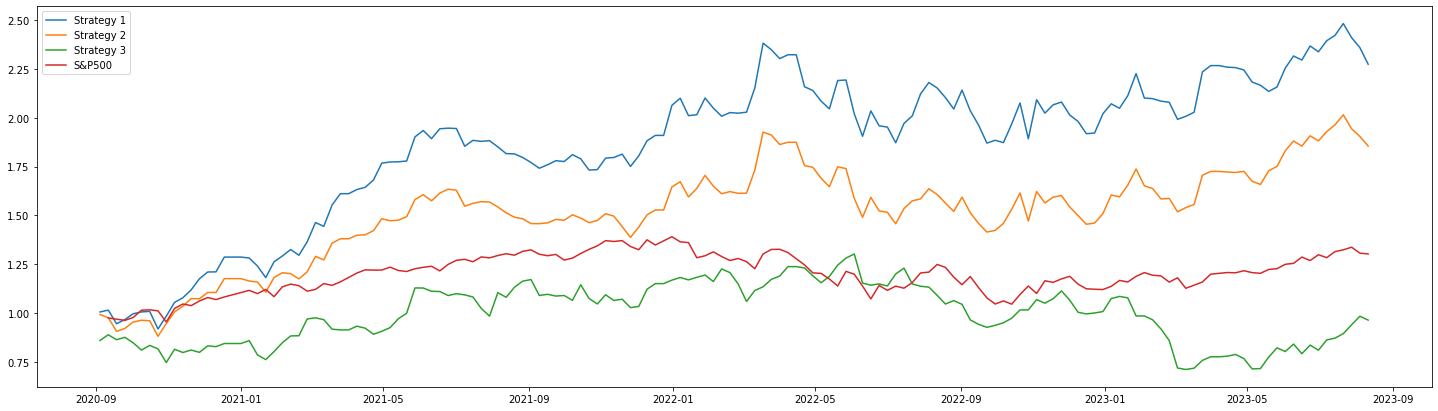

In [13]:
n_spx_shares = wealth_initial / spx['Close'].iloc[0]

plt.figure(figsize=(25, 7))
plt.plot(dates, [w/wealth_initial for w in ws_a1[1:]], label='Strategy 1')
plt.plot(dates, [w/wealth_initial for w in ws_a2[1:]], label='Strategy 2')
plt.plot(dates, [w/wealth_initial for w in ws_a3[1:]], label='Strategy 3')
plt.plot(spx.index[1:], (spx['Close'].iloc[1:] * n_spx_shares) / wealth_initial, label='S&P500')
plt.legend()
plt.show()
plt.close()

<a id="insider"></a>
## 7. Compute insider Capitol Hill long-short portfolio

I originally intended to identify committees that outperform their respective industries. However, as I was unable to achieve any reasonable results, I instead offer a long-short portfolio on a subset of the trades that may be slightly more informed than others. 

To do this, I use a pretrained language model ([BERT](https://github.com/google-research/bert/blob/master/README.md)) to encode the firm's industry and sector string, and the politician's committee strings. Then, for each trade, I select which politician's committee membership is most likely to influence the trade. That is, in a given period, a politician can belong to multiple committees. I first compare the firm's industry to each committee, and select the most similar committee. Specifically, I use cosine similarity metric to compare the encoding vectors and then take the argmax. The similarity score between the chosen committee and the firm's industry then represents how likely it is that the trade was made using exclusive information. That is, should a politician be in a committee that is related to an industry, they are more likely to have exclusive information. Whether the trade was made using said information cannot be determined with this approach.

<a id="lm"></a>
### 7.A. Language model

To encode the string, we use a pretrained language model ([BERT](https://github.com/google-research/bert/blob/master/README.md)). [BERT](https://github.com/google-research/bert/blob/master/README.md) uses a similar technology to ChatGPT (transformers) but is small enough to be run locally. It's pretrained so hopefully it can benefit from some of the context it learned from the training set. That is, it will hopefully be a more complex sentence embedding then simply computing word similarities.

In [14]:
model = SentenceTransformer("bert-base-uncased")

No sentence-transformers model found with name /home/lpupp/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/lpupp/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

<a id="data2"></a>
### 7.B. Load Data

<a id="industrydata"></a>
#### 7.B.a. Load firm industry data

In this section, I load the firm's industry and sector data that was retrieved from [finance.yahoo.com](finance.yahoo.com). 

Since each trade is firm specific and the firm's industry and sector don't change, I encode the text directly and save the encoded vector as a variable. That is, I combine the firm's industry and sector into a string and pass it to the ([BERT](https://github.com/google-research/bert/blob/master/README.md)). The output is a vector---the embedding in some high-dimensional latent space. This is saved to `encoded_sector`.

Then, the data is left-merged with the `df_trades` dataset. We drop all observations (firms) for which we couldn't collect industry and sector information.

In [15]:
df_sectors = pd.read_csv(os.path.join(PATH_DATA, 'YahooFinance_industry.csv')).dropna(subset=['industry', 'sector'])
df_sectors['encoded_sector'] = model.encode([f'{x} {y}' for x, y in zip(df_sectors.industry, df_sectors.sector)]).tolist()

df_trades = df_trades.merge(df_sectors, how='left', on='ticker')
df_trades['trade_year'] = df_trades.traded.dt.year
df_trades.dropna(subset=['industry', 'sector'], inplace=True)
df_trades.head(10)

,politician,trade_issuer,ticker,traded,owner,price,size_score,average_size,type_bool,week_date,sector,industry,encoded_sector,trade_year
0,Ro Khanna,Agilent Technologies Inc,A,2020-11-27,Spouse,114.09,9.615805,8000.0,1,2020-11-27,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2020
1,Peter Meijer,Agilent Technologies Inc,A,2021-02-16,Undisclosed,127.95,-9.615805,-8000.0,-1,2021-02-19,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021
2,Ro Khanna,Agilent Technologies Inc,A,2021-07-02,Spouse,148.82,-9.615805,-8000.0,-1,2021-07-02,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021
3,Ro Khanna,Agilent Technologies Inc,A,2021-08-17,Spouse,160.91,9.615805,8000.0,1,2021-08-20,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021
4,Peter Welch,Agilent Technologies Inc,A,2021-11-18,Undisclosed,162.16,-9.615805,-8000.0,-1,2021-11-19,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021
5,Ro Khanna,Agilent Technologies Inc,A,2021-12-14,Spouse,151.88,-10.819778,-32500.0,-1,2021-12-17,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021
6,Ro Khanna,Agilent Technologies Inc,A,2022-01-21,Spouse,137.51,9.615805,8000.0,1,2022-01-21,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022
7,Ro Khanna,Agilent Technologies Inc,A,2022-02-17,Spouse,130.25,11.512925,75000.0,1,2022-02-18,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022
8,Ro Khanna,Agilent Technologies Inc,A,2022-05-05,Spouse,122.15,-11.512925,-75000.0,-1,2022-05-06,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022
9,Ro Khanna,Agilent Technologies Inc,A,2022-06-16,Spouse,114.96,10.819778,32500.0,1,2022-06-17,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022


<a id="committeedata"></a>
#### 7.B.b. Load committee data

Next, I load the committee membership data. This data is slightly more cumbersome to work with. For each politician, we collected all historical committee memberships. Politicians can be in multiple committees. Memberships seem to be valid for 2 years. Therefore, we saved the data in a dict of the follow structure:

```
committee_membership = { 
    politician_name_1: { 
        '2018-2019' : [committee_1, committee_2, committee_3], 
        '2020-2021' : [committee_1, committee_2, committee_5, committee_6], 
        ...  
    }, 
    politician_name_2: { 
        ... 
    }, 
    ... 
}
```

To allocate the committees to a trade I need to split the keys to the corresponding years.

Furthermore, as there are multiple variations of the same committee (distinguished by politicians rank in committee), I clean the original scraped committees in the `get_committee_list` function. For example, a politician that is the chair of the finance committee would belong to 'finance committee, chair', while others in the finance committee would just belong to 'finance committee'. I do not which to take rank into consideration so I just drop it.

Then, I directly encode each committee a politician is in and save the list of committes to the `committees` variable, and the list of encoded committees to the `encoded_committees` variable.

Finally, I compute the cosine similarity between each politicians committee (`encoded_committees`) with the firm's industry (`encoded_sector`). This list of similarities is stored to `cosine_similarity` and is the same length as `encoded_committees`.

In [16]:
with open(os.path.join(PATH_DATA, 'ballotpedia.yml'), 'r') as f_nm:
    committee_membership = yaml.load(f_nm)

df_politician_committees = get_committee_list(df_trades, committee_membership).dropna(subset=['committees'])
df_politician_committees = encode_committees(df_politician_committees, model)

df_trades = df_trades.merge(df_politician_committees, how='left', on=['politician', 'trade_year'])
df_trades.dropna(subset=['committees'], inplace=True)

df_trades['cosine_similarity'] = [cosine_similarity(np.array(x).reshape(1, -1), y) for x, y in df_trades[['encoded_sector', 'encoded_committees']].values]

df_trades.head(10)

/home/lpupp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


,politician,trade_issuer,ticker,traded,owner,price,size_score,average_size,type_bool,week_date,sector,industry,encoded_sector,trade_year,committees,encoded_committees,cosine_similarity
0,Ro Khanna,Agilent Technologies Inc,A,2020-11-27,Spouse,114.09,9.615805,8000.0,1,2020-11-27,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2020,"[budget, oversight and accountability, armed s...","[[0.10015931, 0.14533967, -0.3032098, 0.127218...","[[0.5131847717213841, 0.597169744609889, 0.612..."
1,Peter Meijer,Agilent Technologies Inc,A,2021-02-16,Undisclosed,127.95,-9.615805,-8000.0,-1,2021-02-19,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[foreign affairs, science space and technology...","[[0.5801798, -0.0829261, -0.2724679, -0.162714...","[[0.3850621618860569, 0.6899335081101372, 0.57..."
2,Ro Khanna,Agilent Technologies Inc,A,2021-07-02,Spouse,148.82,-9.615805,-8000.0,-1,2021-07-02,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."
3,Ro Khanna,Agilent Technologies Inc,A,2021-08-17,Spouse,160.91,9.615805,8000.0,1,2021-08-20,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."
4,Peter Welch,Agilent Technologies Inc,A,2021-11-18,Undisclosed,162.16,-9.615805,-8000.0,-1,2021-11-19,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[national security, defense intelligence and w...","[[-0.09139687, -0.24679013, -0.44863802, -0.02...","[[0.6055036330295871, 0.6272212671224484, 0.59..."
5,Ro Khanna,Agilent Technologies Inc,A,2021-12-14,Spouse,151.88,-10.819778,-32500.0,-1,2021-12-17,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."
6,Ro Khanna,Agilent Technologies Inc,A,2022-01-21,Spouse,137.51,9.615805,8000.0,1,2022-01-21,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."
7,Ro Khanna,Agilent Technologies Inc,A,2022-02-17,Spouse,130.25,11.512925,75000.0,1,2022-02-18,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."
8,Ro Khanna,Agilent Technologies Inc,A,2022-05-05,Spouse,122.15,-11.512925,-75000.0,-1,2022-05-06,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."
9,Ro Khanna,Agilent Technologies Inc,A,2022-06-16,Spouse,114.96,10.819778,32500.0,1,2022-06-17,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73..."


<a id="insideinfo"></a>
### 7.C. Identifying "insider information"

Finally, I attempt to identify trades which are more likely to have been made with exclusive information. To do this, I take the argmax of the `cosine_similarity` variable to identify which committee is most similar to the traded industry. I store the most similar committee to `max_committee` and the corresponding similarity score to `max_similarity`.

In [17]:
df_trades['arg_max'] = df_trades['cosine_similarity'].apply(np.argmax)

df_trades.dropna(subset=['sector', 'industry', 'committees'], inplace=True)

df_trades['max_similarity'] = df_trades.apply(lambda x: x.cosine_similarity[0][x.arg_max], axis=1)
df_trades['max_committee'] = df_trades.apply(lambda x: x.committees[x.arg_max], axis=1)

df_trades['ticker'] = df_trades['ticker'].astype('category')
df_trades['max_committee'] = df_trades['max_committee'].astype('category')

df_trades.head(10)

,politician,trade_issuer,ticker,traded,owner,price,size_score,average_size,type_bool,week_date,sector,industry,encoded_sector,trade_year,committees,encoded_committees,cosine_similarity,arg_max,max_similarity,max_committee
0,Ro Khanna,Agilent Technologies Inc,A,2020-11-27,Spouse,114.09,9.615805,8000.0,1,2020-11-27,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2020,"[budget, oversight and accountability, armed s...","[[0.10015931, 0.14533967, -0.3032098, 0.127218...","[[0.5131847717213841, 0.597169744609889, 0.612...",2,0.612124,armed services
1,Peter Meijer,Agilent Technologies Inc,A,2021-02-16,Undisclosed,127.95,-9.615805,-8000.0,-1,2021-02-19,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[foreign affairs, science space and technology...","[[0.5801798, -0.0829261, -0.2724679, -0.162714...","[[0.3850621618860569, 0.6899335081101372, 0.57...",4,0.740881,research and technology
2,Ro Khanna,Agilent Technologies Inc,A,2021-07-02,Spouse,148.82,-9.615805,-8000.0,-1,2021-07-02,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73...",2,0.739976,cyber innovative technologies and information ...
3,Ro Khanna,Agilent Technologies Inc,A,2021-08-17,Spouse,160.91,9.615805,8000.0,1,2021-08-20,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73...",2,0.739976,cyber innovative technologies and information ...
4,Peter Welch,Agilent Technologies Inc,A,2021-11-18,Undisclosed,162.16,-9.615805,-8000.0,-1,2021-11-19,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[national security, defense intelligence and w...","[[-0.09139687, -0.24679013, -0.44863802, -0.02...","[[0.6055036330295871, 0.6272212671224484, 0.59...",6,0.693255,energy and commerce
5,Ro Khanna,Agilent Technologies Inc,A,2021-12-14,Spouse,151.88,-10.819778,-32500.0,-1,2021-12-17,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2021,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73...",2,0.739976,cyber innovative technologies and information ...
6,Ro Khanna,Agilent Technologies Inc,A,2022-01-21,Spouse,137.51,9.615805,8000.0,1,2022-01-21,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73...",2,0.739976,cyber innovative technologies and information ...
7,Ro Khanna,Agilent Technologies Inc,A,2022-02-17,Spouse,130.25,11.512925,75000.0,1,2022-02-18,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73...",2,0.739976,cyber innovative technologies and information ...
8,Ro Khanna,Agilent Technologies Inc,A,2022-05-05,Spouse,122.15,-11.512925,-75000.0,-1,2022-05-06,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, cyber inn...","[[-0.07544744, 0.25799337, -0.4654745, 0.04831...","[[0.5969601993944671, 0.6105606428398451, 0.73...",2,0.739976,cyber innovative technologies and information ...
9,Ro Khanna,Agilent Technologies Inc,A,2022-06-16,Spouse,114.96,10.819778,32500.0,1,2022-06-17,Healthcare,Diagnostics & Research,"[0.2887819707393646, 0.06971820443868637, -0.1...",2022,"[agriculture, government operations, 

<a id="insideptf"></a>
### 7.D. Constructing the portfolio

To construct the portfolio, a `max_similarity` cutoff needs to be determined. We can see there is a heaping around 0.65 in the histogram plot below. We would like to include only those trades, which have the highest likelihood of being informed by insider information. Choosing a large number is more restrictive. I choose 0.8 as it seems to perform best based on a simple grid search.

I construct the portfolio using the same strategy as [Strategy 1](#strat1).

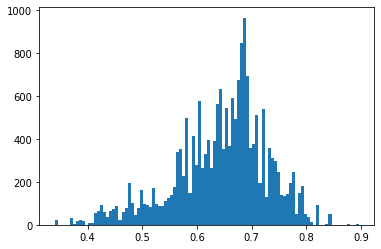

In [18]:
plt.hist(df_trades['max_similarity'], bins=100)
plt.show()
plt.close()

In [19]:
df_sub = df_trades[(df_trades['max_similarity'] >= 0.8)].copy()

ws_in = [wealth_initial]

for i, date in enumerate(dates):
    wealth = ws_in[-1]

    portfolio = df_sub.loc[(df_sub.week_date == date), :].copy()
    portfolio['ticker'] = portfolio['ticker'].cat.remove_unused_categories()

    average_size = portfolio.groupby('ticker')['average_size'].sum().to_frame().reset_index()
    portfolio = portfolio.groupby('ticker')['size_score'].sum().sort_values().to_frame().reset_index()

    portfolio = portfolio.merge(average_size, how='left', on='ticker')
    portfolio = portfolio.merge(df_prices.loc[df_prices.Date == date, :], how='left', left_on='ticker', right_on='Ticker').drop(columns=['Ticker'])
    portfolio.dropna(subset=['Close', 'Close_lag'], inplace=True)

    cutoff = int(portfolio.shape[0] / 3)
    
    if portfolio.shape[0] > 0:

        short = portfolio[:cutoff].copy()
        long = portfolio[-cutoff:].copy()

        long['weights'] = np.abs(long['average_size']) / np.abs(long['average_size']).sum()
        short['weights'] = np.abs(short['average_size']) / np.abs(short['average_size']).sum()

        scale = 0.3 if short.shape[0] > 0 else 0.0

        long['holding_value'] = long['weights'] * wealth * (1 + scale)
        short['holding_value'] = short['weights'] * wealth * -scale

        long['holding_size'] = long['holding_value'] / long['Close']
        short['holding_size'] = short['holding_value'] / short['Close']

        long['holding_value_next'] = long['holding_size'] * long['Close_lag']
        short['holding_value_next'] = short['holding_size'] * short['Close_lag']

        # long['return'] = long['holding_value_next'] - long['holding_value']
        # short['return'] = short['holding_value_next'] - short['holding_value']

        wealth_long_new = long['holding_value_next'].sum()
        wealth_short_new = short['holding_value_next'].sum()

        wealth_new = wealth_long_new + wealth_short_new

    ws_in.append(wealth_new)



<a id="results2"></a>
#### 7.D.a. Results

The "insider" portfolio unfortunately does not outperform the full portfolio. It does, however, still consistently outperforms the S&P500. It could be that further tuning of the portfolio (even given the same simplifications), could improve the performance further. However, at this stage, using better information to identify insider trades would be more fruitful.

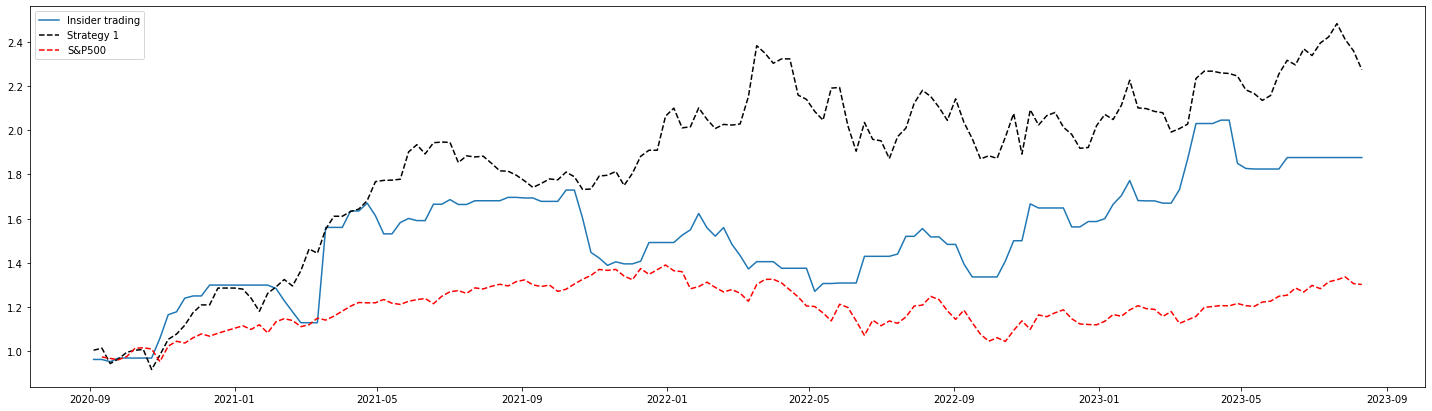

In [20]:
plt.figure(figsize=(25, 7))
plt.plot(dates, [w/wealth_initial for w in ws_in[1:]], label='Insider trading')
plt.plot(dates, [w/wealth_initial for w in ws_a1[1:]], '--k', label='Strategy 1')
plt.plot(spx.index[1:], (spx['Close'].iloc[1:] * n_spx_shares) / wealth_initial, '--r', label='S&P500')
plt.legend()
plt.show()
plt.close()


<a id="conclusion"></a>
## 8. Conclusion

The long-short portfolio yields decent results, while the insider trading portfolio is less impressive. The current strategy's performance is constrained by simplifications, such as holding positions for only a week due to difficulty in determining open trades, relying on basic text matching, and prioritizing only the most relevant committee. Expanding the strategy to incorporate more data, like government contracts and policy decisions, may enhance outcomes.

A trading approach to consider is adopting hedge fund tactics to mitigate risk. For instance, if we identify an insider trade where Politician A purchases Stock X from Industry Y, we could counterbalance by shorting the rest of Industry Y and solely having a long position in X. This isolates the company-specific risk but would necessitate deeper insights into politicians' buying motives.

It's vital to note the practicality of trading based on this strategy. Politicians have a 45-day window to declare trades. Given that our most effective strategy ([Strategy 1](#strat)) retains positions for just a week, it's unfeasible unless trades are reported within that week.  
